In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def open_data(params):
    name = "data/PLOT2/data/k{}_i{}_d{}_m{}_epk{}_epi{}_v{}.csv".format(
            params['k'],
            params['i'],
            params['d'],
            params['m'],
            params['epk'],
            params['epi'],
            params['v'])
    data = np.loadtxt(name, delimiter=',', dtype=str)
    data = data[:, :-1].astype(int).transpose()
    data = data[np.where(np.sum(data, 1) != 0)].transpose()
    return data

In [3]:
def temporal_entropy(data):
    t_sum = np.sum(data, 1)[:, None]
    data_probs = data / (t_sum + 1e-8)
    data_entropy = -np.sum(data_probs * np.log2(data_probs + 1e-8), 1)
    return data_entropy

In [4]:
def temporal_entropy_build(k_set, m, v):
    full_data = np.zeros((len(k_set), 1005))
    for i,k in enumerate(k_set):
        data = open_data({
                                'k':k,
                                'i':0,
                                'd':10,
                                'm':m,
                                'epk':0.4,
                                'epi':0.2,
                                'v':v
                            })
        data_entr = temporal_entropy(data)
        full_data[i, :len(data_entr)] = data_entr
        print("DONE k={}".format(k))
    return full_data

(1001, 1599)


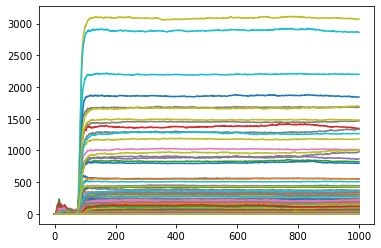

In [13]:
fig, ax = plt.subplots()
data = open_data({
                                'k':1,
                                'i':0,
                                'd':10,
                                'm':0.02,
                                'epk':0.4,
                                'epi':0.2,
                                'v':2
                            })
ax.plot(data)
print(data.shape)
plt.show()

(1001,)


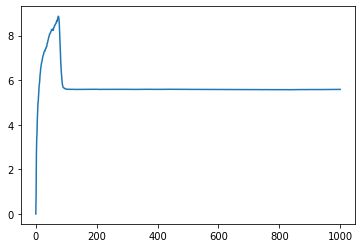

In [14]:
entropy_data = temporal_entropy(data)
fix, ax = plt.subplots()
print(entropy_data.shape)
ax.plot(entropy_data)

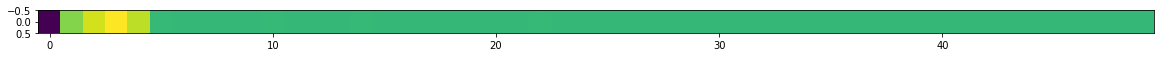

In [15]:
im = entropy_data[None, :][:, np.arange(0, 1000, 20)]
plt.figure(figsize=(20, 5))
plt.imshow(im)

In [18]:
data_entr = temporal_entropy_build(k_set=[0,2,4,6], m=0.02, v=0)

DONE k=0
DONE k=2
DONE k=4
DONE k=6


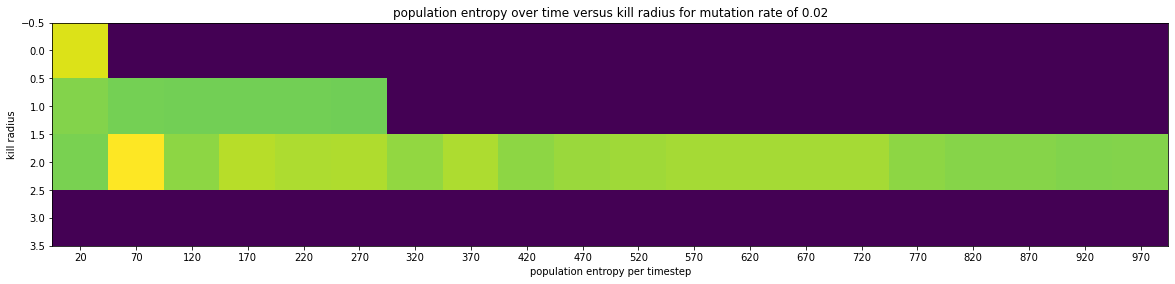

In [19]:
fig, ax = plt.subplots(figsize=(20,5))
x_select = np.arange(20, 1000, 50)
im = data_entr[:, x_select]
ax.imshow(im)
# plt.colorbar()
ax.set_xlabel("population entropy per timestep")
ax.set_ylabel("kill radius")
ax.set_xticks(range(len(x_select)))
ax.set_xticklabels(x_select)
ax.set_title("population entropy over time versus kill radius for mutation rate of 0.02")
plt.show()

In [17]:
def pop_entropy_for_mutation_rate():
    dataset = []
    for m in [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]:
        print("for m={}".format(m))
        data_entr = []
        for v in [0,1,2]:
            print("\tfor v={}".format(v))
            d = temporal_entropy_build(k_set=[0,1,2,3,4,5,6,7], m=m, v=v)
            data_entr.append(d[:, :, None])
        data_entr = np.concatenate(data_entr, 2)
        print(data_entr.shape)
        dataset.append(data_entr)
    return dataset
    
def plot_data_set(data):
    for d in data:
        fig, ax = plt.subplots(figsize=(20,5))
        x_select = np.arange(20, 1000, 50)
        im = np.clip(d[:, x_select], 0.0, 10.0)
        ax.imshow(im, vmin=0.0, vmax=5.0)
        # plt.colorbar()
        ax.set_xlabel("population entropy per timestep")
        ax.set_ylabel("kill radius")
        ax.set_xticks(range(len(x_select)))
        ax.set_xticklabels(x_select)
#         ax.set_title("population entropy over time versus kill radius for mutation rate of {}".format(m))
        print("data stats: MIN: {}, MAX: {}".format(np.min(d), np.max(d)))
        plt.show()

In [7]:
dataset = pop_entropy_for_mutation_rate()

for m=0
	for v=0
DONE k=0
DONE k=1
DONE k=2
DONE k=3
DONE k=4
DONE k=5
DONE k=6
DONE k=7
	for v=1
DONE k=0
DONE k=1
DONE k=2
DONE k=3
DONE k=4
DONE k=5
DONE k=6
DONE k=7
	for v=2
DONE k=0
DONE k=1
DONE k=2
DONE k=3
DONE k=4
DONE k=5
DONE k=6
DONE k=7
(8, 1005, 3)
for m=0.01
	for v=0
DONE k=0
DONE k=1
DONE k=2
DONE k=3
DONE k=4
DONE k=5
DONE k=6
DONE k=7
	for v=1
DONE k=0
DONE k=1
DONE k=2
DONE k=3
DONE k=4
DONE k=5
DONE k=6
DONE k=7
	for v=2
DONE k=0
DONE k=1
DONE k=2
DONE k=3
DONE k=4
DONE k=5
DONE k=6
DONE k=7
(8, 1005, 3)
for m=0.02
	for v=0
DONE k=0
DONE k=1
DONE k=2
DONE k=3
DONE k=4
DONE k=5
DONE k=6
DONE k=7
	for v=1
DONE k=0
DONE k=1
DONE k=2
DONE k=3
DONE k=4
DONE k=5
DONE k=6
DONE k=7
	for v=2
DONE k=0
DONE k=1
DONE k=2
DONE k=3
DONE k=4
DONE k=5
DONE k=6
DONE k=7
(8, 1005, 3)
for m=0.03
	for v=0
DONE k=0
DONE k=1
DONE k=2
DONE k=3
DONE k=4
DONE k=5
DONE k=6
DONE k=7
	for v=1
DONE k=0
DONE k=1
DONE k=2
DONE k=3
DONE k=4
DONE k=5
DONE k=6
DONE k=7
	for v=2
DONE k=0
DONE k=1
DO

data stats: MIN: -1.4426589863593831e-08, MAX: 0.0


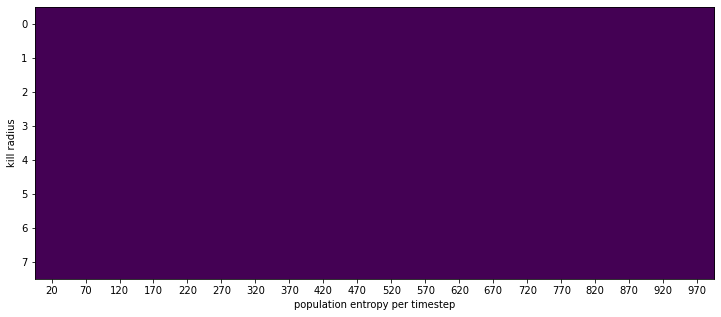

data stats: MIN: -1.3771179692712454e-08, MAX: 7.647515681833895


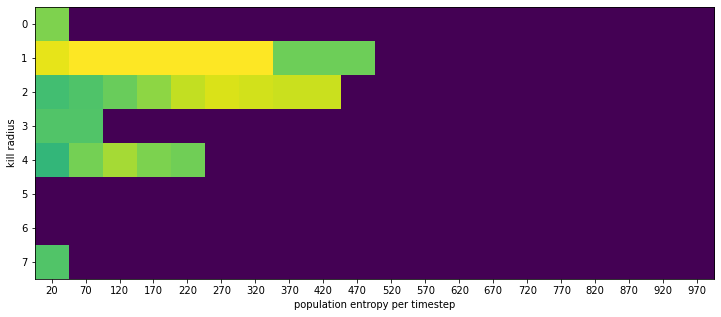

data stats: MIN: -1.0820212673281368e-08, MAX: 8.864763418655743


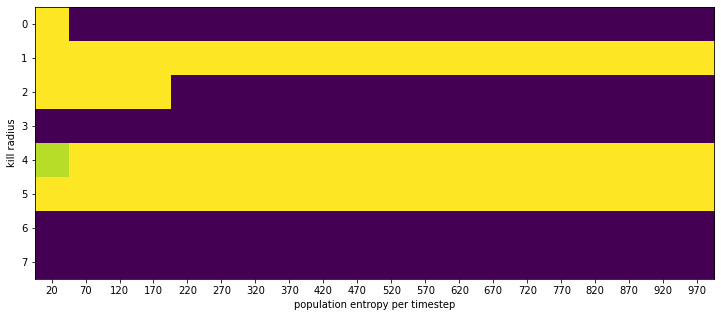

data stats: MIN: -9.617967030248829e-09, MAX: 8.879032938553841


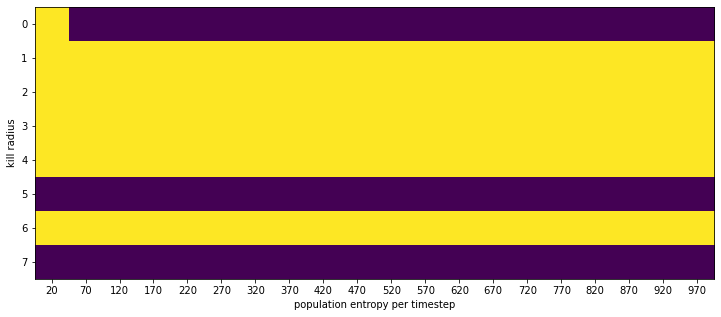

data stats: MIN: -7.213475106504068e-09, MAX: 9.892904446737335


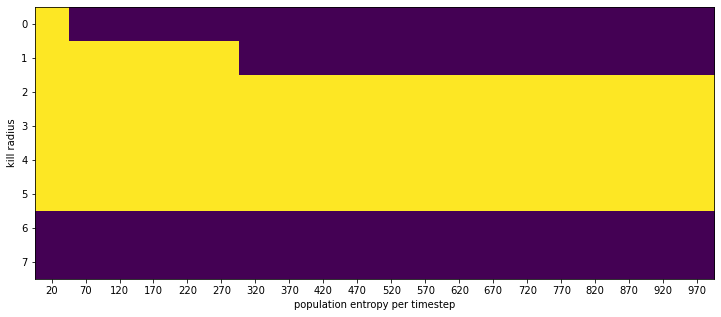

data stats: MIN: -7.213475106504068e-09, MAX: 10.347595875464547


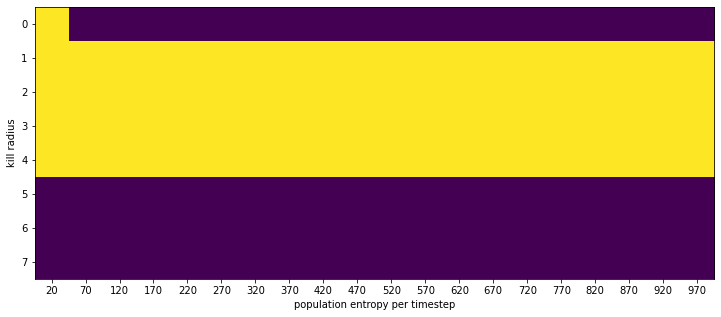

data stats: MIN: 0.0, MAX: 11.112773912718815


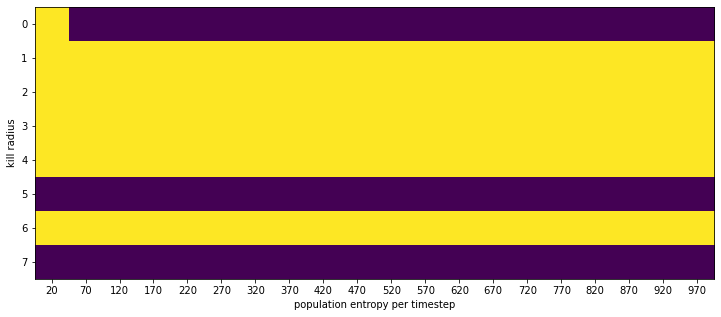

data stats: MIN: 0.0, MAX: 11.760700800007434


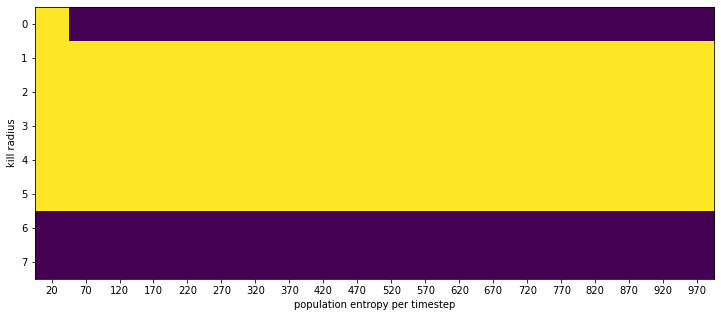

data stats: MIN: 0.0, MAX: 11.891571948567398


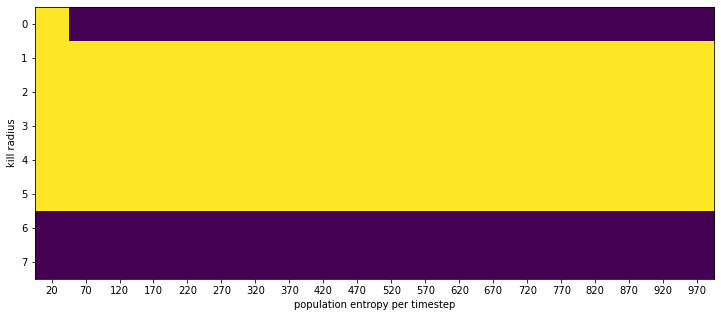

data stats: MIN: 0.0, MAX: 11.999722524172206


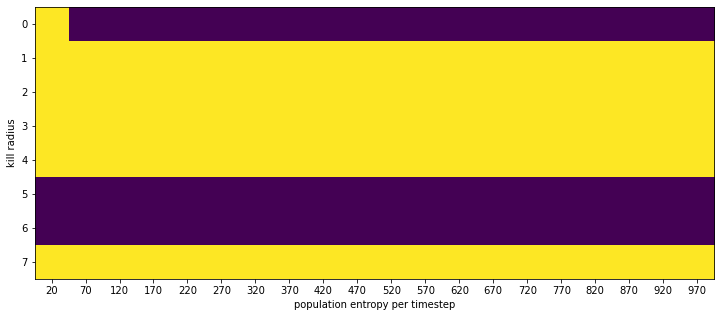

data stats: MIN: 0.0, MAX: 12.32585173572681


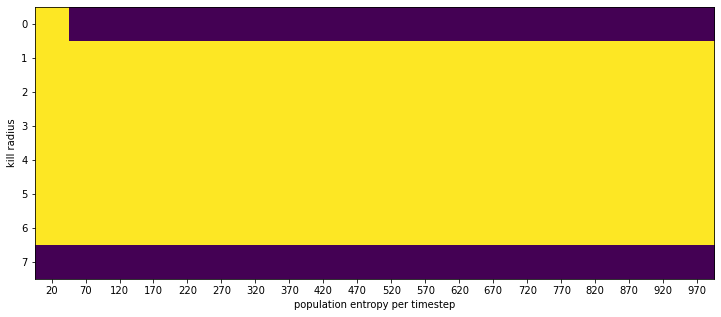

In [20]:
dataset_single = [d[:, :, 2] for d in dataset]
plot_data_set(dataset_single)

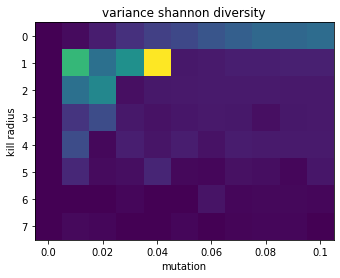

In [43]:
dataset_var = [np.var(d, 1) for d in dataset]
dataset_var_mean = [np.mean(d, 1)[:, None] for d in dataset_var]
dataset_var_mean_im = np.concatenate(dataset_var_mean, 1)
dataset_var_mean_im.shape
fig, ax = plt.subplots()
ax.imshow(dataset_var_mean_im)
# plt.colorbar()
ax.set_xlabel("mutation")
ax.set_ylabel("kill radius")
# ax.set_xticks(np.arange(0, 7, 2))
ax.set_xticklabels(['', '0.0', '0.02', '0.04', '0.06', '0.08', '0.1'])
# ax.set_yticklabels(['', '0', '2', '4', '6', '8', '10'])
ax.set_title("variance shannon diversity")
plt.show()

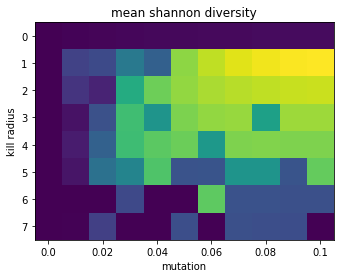

In [42]:
dataset_var = [np.mean(d, 1) for d in dataset]
dataset_var_mean = [np.mean(d, 1)[:, None] for d in dataset_var]
dataset_var_mean_im = np.concatenate(dataset_var_mean, 1)
dataset_var_mean_im.shape
fig, ax = plt.subplots()
ax.imshow(dataset_var_mean_im)
# plt.colorbar()
ax.set_xlabel("mutation")
ax.set_ylabel("kill radius")
ax.set_xticklabels(['', '0.0', '0.02', '0.04', '0.06', '0.08', '0.1'])
# ax.set_yticklabels(['', '0', '2', '4', '6', '8', '10'])
ax.set_title("mean shannon diversity")
plt.show()

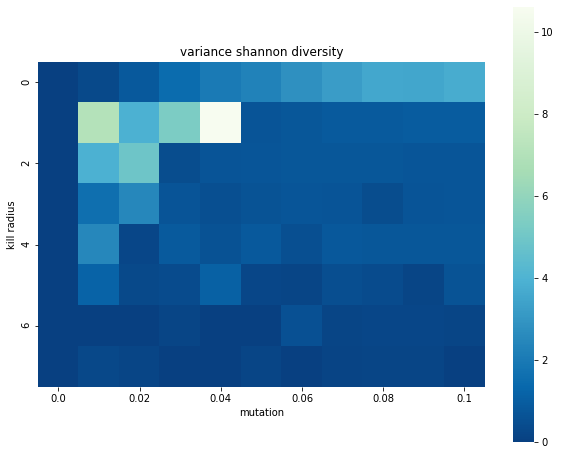

In [37]:
dataset_var = [np.var(d, 1) for d in dataset]
dataset_var_mean = [np.mean(d, 1)[:, None] for d in dataset_var]
dataset_var_mean_im = np.concatenate(dataset_var_mean, 1)
dataset_var_mean_im.shape

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dataset_var_mean_im, cmap="GnBu_r", xticklabels=2, yticklabels=2, ax=ax, square=True)
ax.set_xlabel("mutation")
ax.set_ylabel("kill radius")
ax.set_xticklabels(['0.0', '0.02', '0.04', '0.06', '0.08', '0.1'])
ax.set_title("variance shannon diversity")
plt.show()

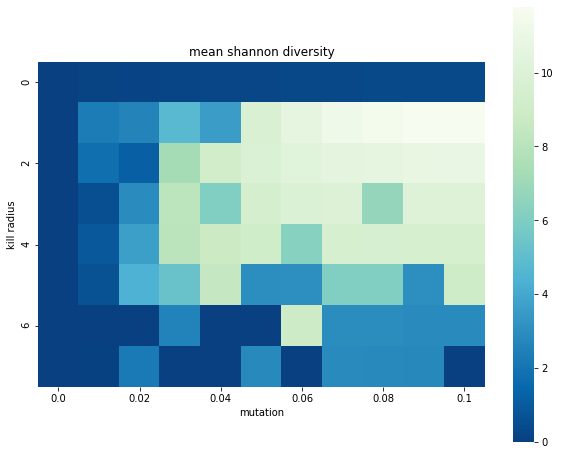

In [36]:
dataset_var = [np.mean(d, 1) for d in dataset]
dataset_var_mean = [np.mean(d, 1)[:, None] for d in dataset_var]
dataset_var_mean_im = np.concatenate(dataset_var_mean, 1)
dataset_var_mean_im.shape

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dataset_var_mean_im, cmap="GnBu_r", xticklabels=2, yticklabels=2, ax=ax, square=True)
ax.set_xlabel("mutation")
ax.set_ylabel("kill radius")
ax.set_xticklabels(['0.0', '0.02', '0.04', '0.06', '0.08', '0.1'])
ax.set_title("mean shannon diversity")
plt.show()

In [124]:
name = "data/PLOT2/data/k2_i0_d10_m0.03_epk0.4_epi0.2_v2.csv"
data = np.loadtxt(name, delimiter=',', dtype=str)
data = data[:, :-1].astype(int).transpose()
data = data[np.where(np.sum(data, 1) != 0)]#.transpose()

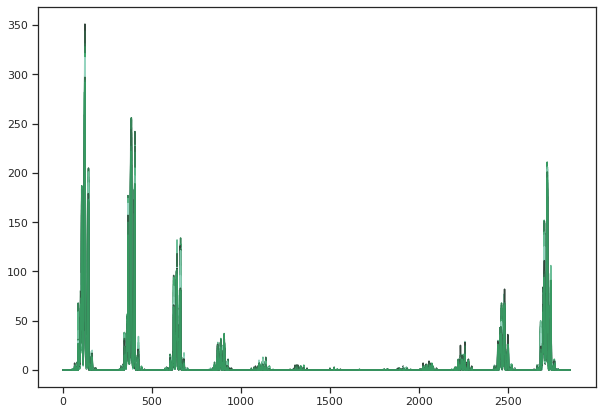

In [125]:
import pandas as pd

sns.set(style='ticks')
# p = sns.color_palette("BuGn", n_colors=data.shape[1])[::-1]
p = sns.color_palette("BuGn_d", n_colors=10)
sns.set_palette(p)
# sns.axes_style({
#     "axes.spines.top" : False
# })

fig,ax = plt.subplots(figsize=(10, 7))

# df = pd.DataFrame(data)
# print(df)
plt.plot(data[:, 380:405])
# sns.lineplot(data=df.rename(columns=lambda x: str(x)), x="0", y="1")
data.shape
plt.show()

In [43]:
name = "data/PLOT2/data/k2_i0_d10_m0.03_epk0.4_epi0.2_v2.csv"
data = np.loadtxt(name, delimiter=',', dtype=str)
data = data[:, :-1].astype(int).transpose()
bin_num = 20 #8000
bin_size = data.shape[0] // bin_num
data_n2 = np.zeros((bin_num, data.shape[1]))
for i in range(0, bin_num):
    data_n2[i, :] = np.sum(data[i*bin_size:(i+1)*bin_size, :], 0)
data_n2 = data_n2[np.where(np.sum(data_n2, 1) != 0)].transpose()
print(data_n2.shape)

(1001, 19)


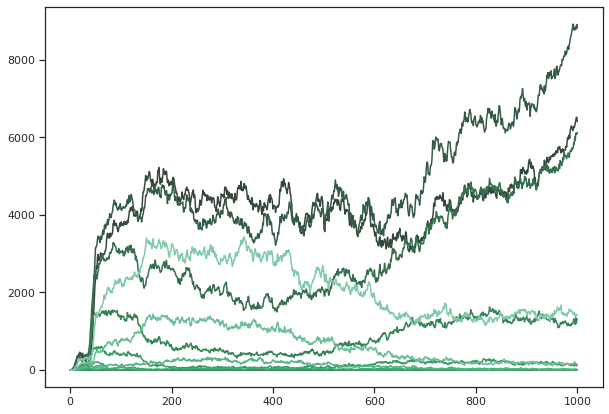

In [44]:
import pandas as pd

sns.set(style='ticks')
# p = sns.color_palette("BuGn", n_colors=data.shape[1])[::-1]
p = sns.color_palette("BuGn_d", n_colors=10)
sns.set_palette(p)
# sns.axes_style({
#     "axes.spines.top" : False
# })

fig,ax = plt.subplots(figsize=(10, 7))

# df = pd.DataFrame(data)
# print(df)
plt.plot(data_n2)
# sns.lineplot(data=df.rename(columns=lambda x: str(x)), x="0", y="1")
data.shape
plt.show()

(1001,)


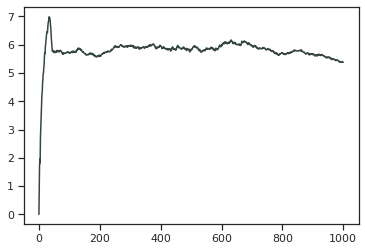

In [19]:
t_entr = temporal_entropy(data_n)
print(t_entr.shape)
plt.plot(range(len(t_entr)), t_entr)

/home/leewang/python-envs/unityMLvenv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


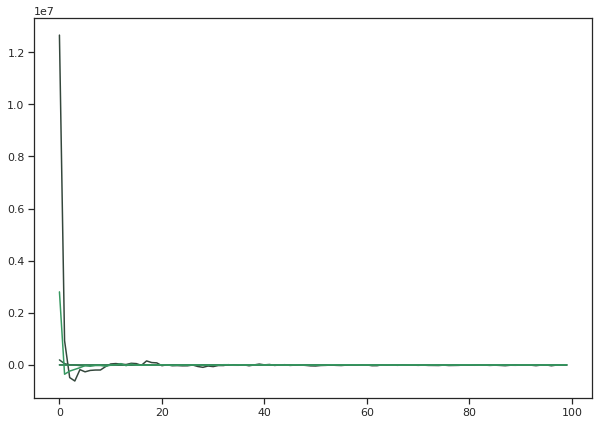

In [68]:
f_data = np.vstack([np.fft.fft(data_n[:, i]) for i in range(data_n.shape[1])]).transpose()
f_data.shape
fig,ax = plt.subplots(figsize=(10, 7))
ax.plot(f_data[:100, :])
plt.show()

In [33]:
name = "data/PLOT2/data/k1_i0_d10_m0.01_epk0.4_epi0.2_v2.csv"
data = np.loadtxt(name, delimiter=',', dtype=str)
data = data[:, :-1].astype(int).transpose()
data = data[np.where(np.sum(data, 1) != 0)].transpose()

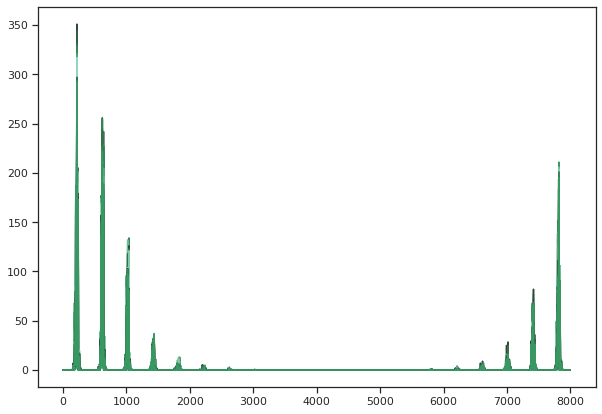

In [59]:
import pandas as pd

sns.set(style='ticks')
# p = sns.color_palette("BuGn", n_colors=data.shape[1])[::-1]
p = sns.color_palette("BuGn_d", n_colors=10)
sns.set_palette(p)
# sns.axes_style({
#     "axes.spines.top" : False
# })

fig,ax = plt.subplots(figsize=(10, 7))

# df = pd.DataFrame(data)
# print(df)
plt.plot(data[:, 380:405])
# sns.lineplot(data=df.rename(columns=lambda x: str(x)), x="0", y="1")
data.shape
plt.show()

/home/leewang/python-envs/unityMLvenv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


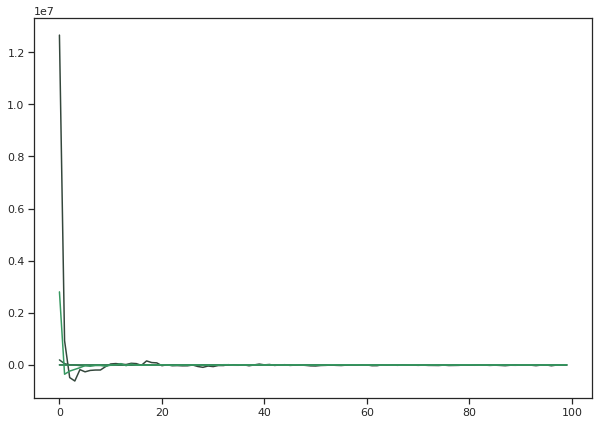

In [65]:
f_data = np.vstack([np.fft.fft(data_n[:, i]) for i in range(data_n.shape[1])]).transpose()
f_data.shape
fig,ax = plt.subplots(figsize=(10, 7))
ax.plot(f_data[:100, :])
plt.show()

In [38]:
name = "data/PLOT3/data/k2_i2_d2_m0.01_epk0.2_epi0.01_v0.csv"
data = np.loadtxt(name, delimiter=',', dtype=str)
data = data[:, :-1].astype(int).transpose()
bin_num = 20
bin_size = data.shape[0] // bin_num
data_n = np.zeros((bin_num, data.shape[1]))
for i in range(0, bin_num):
    data_n[i, :] = np.sum(data[i*bin_size:(i+1)*bin_size, :], 0)
data_n = data_n[np.where(np.sum(data_n, 1) != 0)].transpose()
print(data_n.shape)

(1001, 20)


(1001, 20)
(8000, 1001)


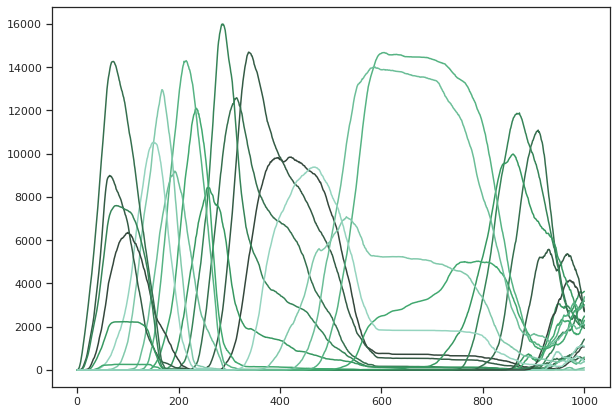

In [39]:
import pandas as pd

sns.set(style='ticks')
p = sns.color_palette("BuGn_d", n_colors=10)
sns.set_palette(p)

print(data_n.shape)
print(data.shape)

fig,ax = plt.subplots(figsize=(10, 7))
# plt.plot(data[:, 400:])
plt.plot(data_n[:, :])
data.shape
plt.show()

/home/leewang/python-envs/unityMLvenv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


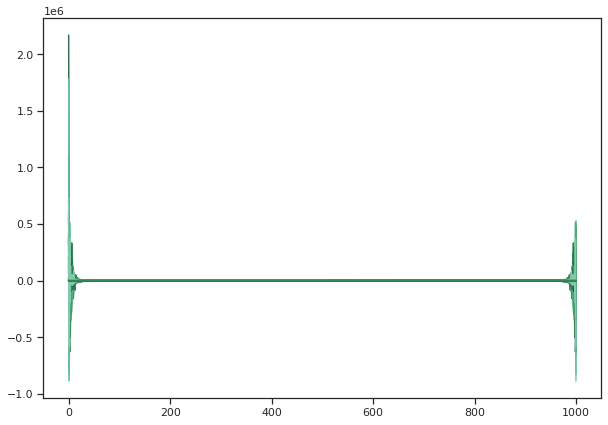

In [12]:
f_data = np.vstack([np.fft.fft(data_n[:, i]) for i in range(data_n.shape[1])]).transpose()
f_data.shape
fig,ax = plt.subplots(figsize=(10, 7))
# ax.plot(f_data[:100, :])
ax.plot(f_data)
plt.show()

(1001,)


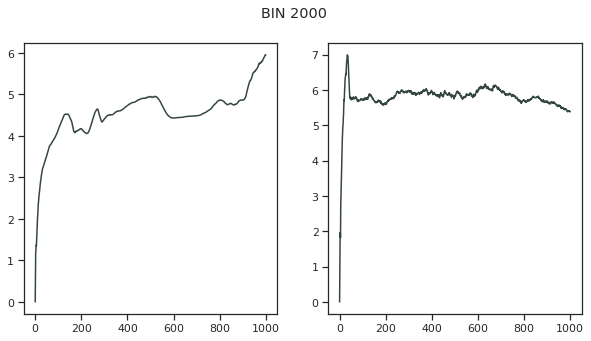

In [32]:
t_entr = temporal_entropy(data_n)
t_entr2 = temporal_entropy(data_n2)
print(t_entr.shape)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(range(len(t_entr)), t_entr)
ax[1].plot(range(len(t_entr2)), t_entr2)
fig.suptitle("BIN 2000")
plt.show()

(1001,)


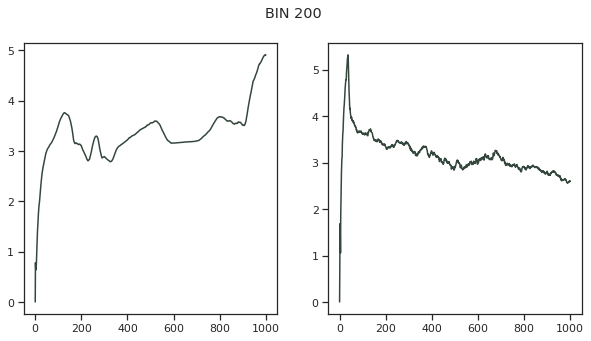

In [37]:
t_entr = temporal_entropy(data_n)
t_entr2 = temporal_entropy(data_n2)
print(t_entr.shape)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(range(len(t_entr)), t_entr)
ax[1].plot(range(len(t_entr2)), t_entr2)
fig.suptitle("BIN 200")
plt.show()

(1001,)


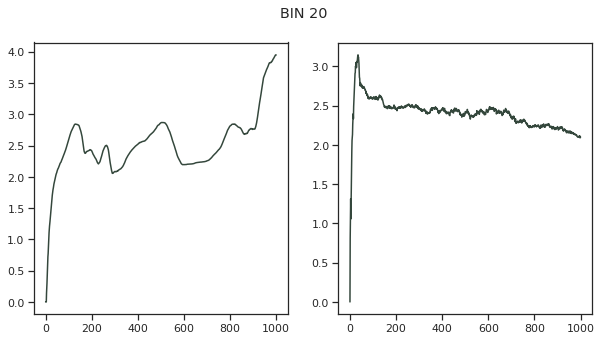

In [45]:
t_entr = temporal_entropy(data_n)
t_entr2 = temporal_entropy(data_n2)
print(t_entr.shape)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(range(len(t_entr)), t_entr)
ax[1].plot(range(len(t_entr2)), t_entr2)
fig.suptitle("BIN 20")
plt.show()

(201,)


/home/leewang/python-envs/unityMLvenv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/leewang/python-envs/unityMLvenv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


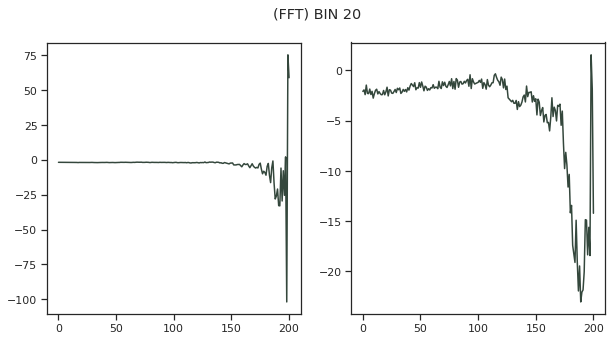

In [52]:
t_entr = np.fft.fft(temporal_entropy(data_n))[800:]
t_entr2 = np.fft.fft(temporal_entropy(data_n2))[800:]
print(t_entr.shape)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(range(len(t_entr)), t_entr)
ax[1].plot(range(len(t_entr2)), t_entr2)
fig.suptitle("(FFT) BIN 20")
plt.show()

In [102]:
def bin_entropy_and_fft(name, bin_num=200):
    data = np.loadtxt(name, delimiter=',', dtype=str)
    data = data[:, :-1].astype(int).transpose()
    bin_size = data.shape[0] // bin_num
    data_n = np.zeros((bin_num, data.shape[1]))
    for i in range(0, bin_num):
        data_n[i, :] = np.sum(data[i*bin_size:(i+1)*bin_size, :], 0)
    data_n = data_n[np.where(np.sum(data_n, 1) != 0)].transpose()[100:, :]
    print("data shape: {}".format(data.shape))
    print("new data shape: {}".format(data_n.shape))

    t_entr = temporal_entropy(data_n)
    t_entr_fft = np.fft.fft(t_entr)
    
    return data_n, t_entr, t_entr_fft

In [129]:
def data_entr_fft_plot(data, entr, entr_fft, title, palette_name="BuGn_d"):
    p = sns.color_palette(palette_name, n_colors=10)
    sns.set_palette(p)
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(title)
    ax[0, 0].plot(data)
    ax[0, 0].set_title("data")
    ax[0, 1].plot(entr)
    ax[0, 1].set_title("entropy")
    ax[0, 2].plot(entr_fft)
    ax[0, 2].set_title("entropy FFT")
    ax[1, 0].plot(entr_fft)
    ax[1, 0].set_title("entropy FFT (end)")
    d = 100
    d_low = len(entr_fft) - d
    ax[1, 0].set_xlim(d, len(entr_fft)+100)
    ax[1, 0].set_ylim(min(entr_fft[d_low:]), max(entr_fft[d_low:]))
    ax[1, 1].plot(entr_fft)
    ax[1, 1].set_title("entropy FFT (start)")
    ax[1, 1].set_xlim(-d, d_low+100)
    ax[1, 1].set_ylim(min(entr_fft[:d_low]), max(entr_fft[:d_low]))

data shape: (8000, 1001)
new data shape: (901, 374)


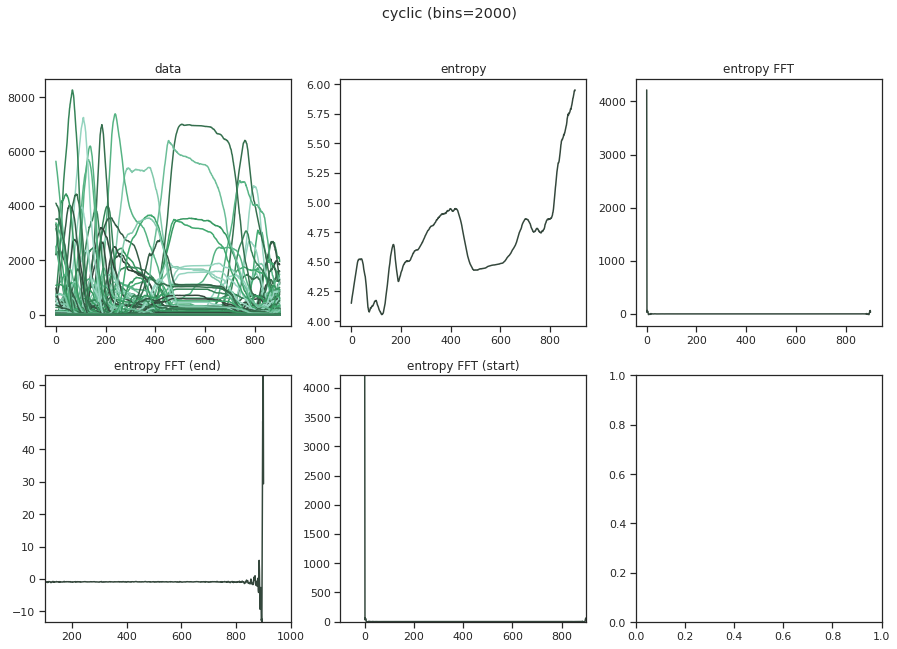

In [107]:
import warnings
warnings.filterwarnings("ignore")

d_data = bin_entropy_and_fft("data/PLOT3/data/k2_i2_d2_m0.01_epk0.2_epi0.01_v0.csv", bin_num=2000)
data_entr_fft_plot(*d_data, title="cyclic (bins=2000)", palette_name="BuGn_d")

data shape: (8000, 1001)
new data shape: (901, 882)


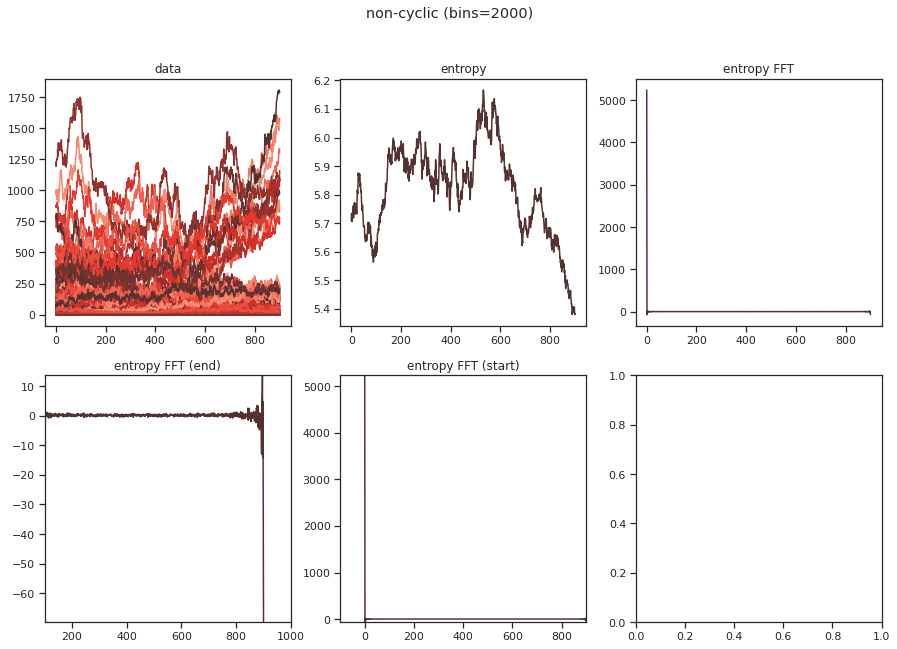

In [108]:
d_data = bin_entropy_and_fft("data/PLOT2/data/k2_i0_d10_m0.03_epk0.4_epi0.2_v2.csv", bin_num=2000)
data_entr_fft_plot(*d_data, title="non-cyclic (bins=2000)", palette_name="Reds_d")

data shape: (8000, 1001)
new data shape: (901, 86)


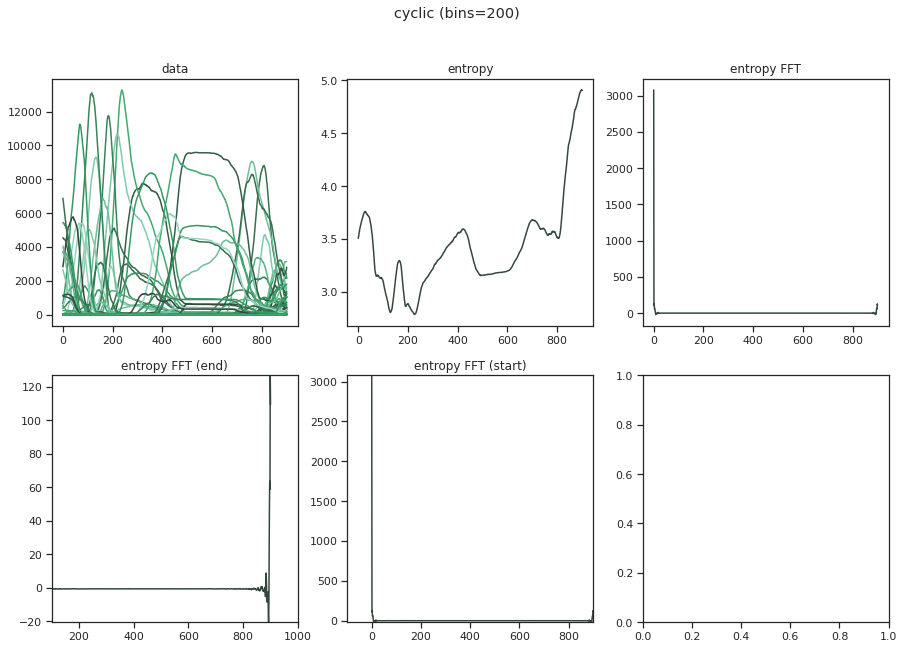

In [109]:
import warnings
warnings.filterwarnings("ignore")

d_data = bin_entropy_and_fft("data/PLOT3/data/k2_i2_d2_m0.01_epk0.2_epi0.01_v0.csv", bin_num=200)
data_entr_fft_plot(*d_data, title="cyclic (bins=200)")

data shape: (8000, 1001)
new data shape: (901, 142)


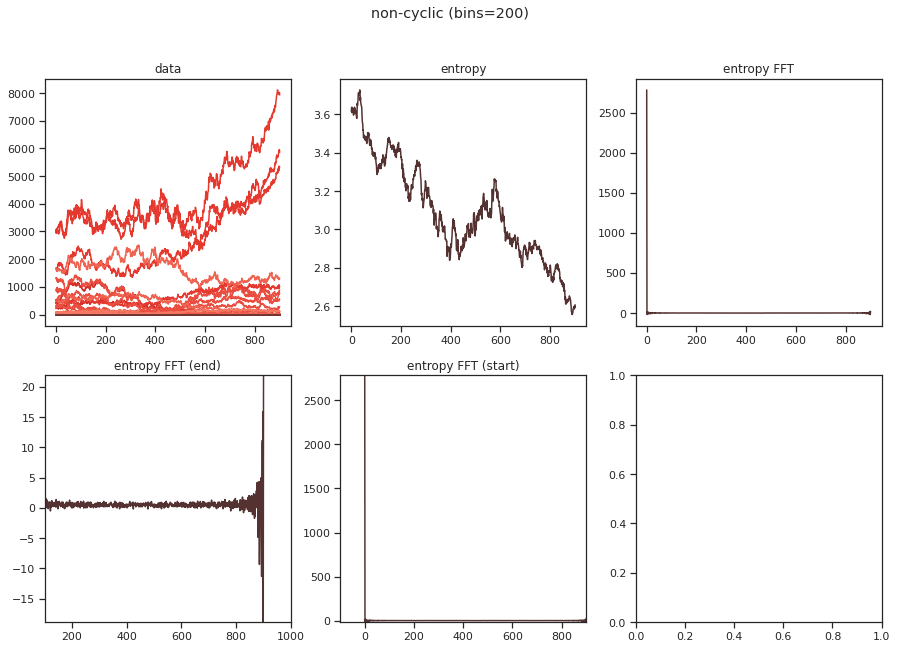

In [110]:
d_data = bin_entropy_and_fft("data/PLOT2/data/k2_i0_d10_m0.03_epk0.4_epi0.2_v2.csv", bin_num=200)
data_entr_fft_plot(*d_data, title="non-cyclic (bins=200)", palette_name="Reds_d")

data shape: (8000, 1001)
new data shape: (901, 10)


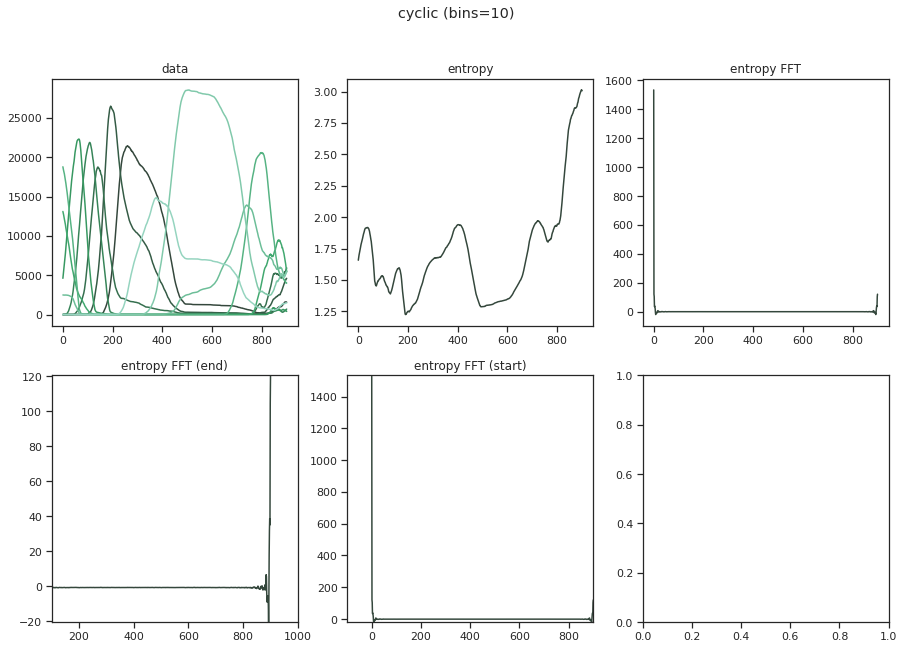

In [111]:
d_data = bin_entropy_and_fft("data/PLOT3/data/k2_i2_d2_m0.01_epk0.2_epi0.01_v0.csv", bin_num=10)
data_entr_fft_plot(*d_data, title="cyclic (bins=10)")

data shape: (8000, 1001)
new data shape: (901, 10)


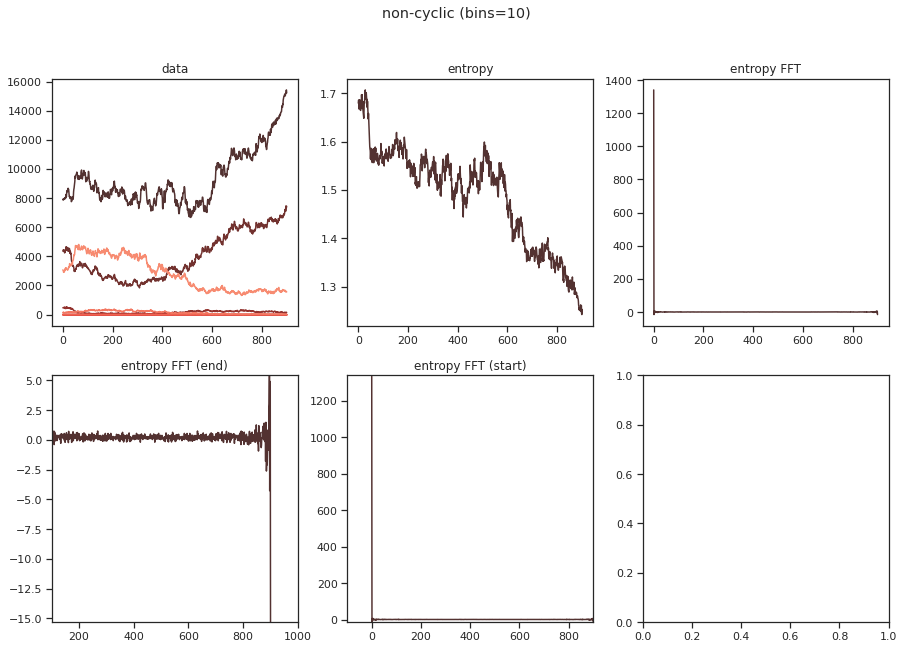

In [112]:
d_data = bin_entropy_and_fft("data/PLOT2/data/k2_i0_d10_m0.03_epk0.4_epi0.2_v2.csv", bin_num=10)
data_entr_fft_plot(*d_data, title="non-cyclic (bins=10)", palette_name="Reds_d")

data shape: (7999, 501)
new data shape: (401, 14)


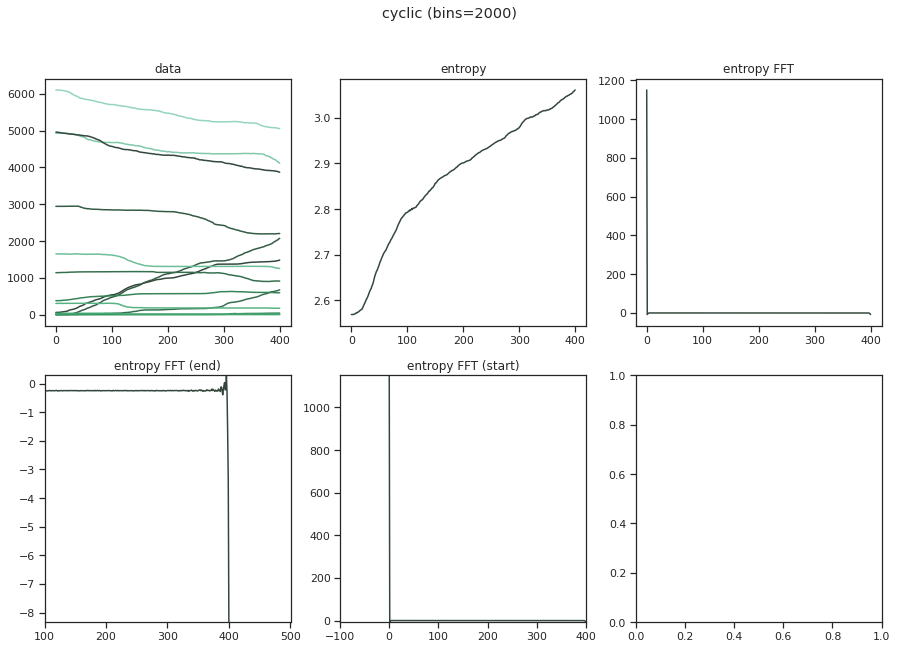

In [132]:
d_data = bin_entropy_and_fft("data/RUN1/k1_i0_d2_m0.02_ep0.1.csv", bin_num=2000)
data_entr_fft_plot(*d_data, title="cyclic (bins=2000)", palette_name="BuGn_d")